In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as misngnum
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
from IPython.core.display import display, HTML
from skimage import io
from wordcloud import WordCloud
from PIL import Image
import requests
from io import BytesIO
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

/var/folders/1b/20x15wkx6_bckb1qgcb679680000gn/T/ipykernel_42945/1222330717.py:14: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [84]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [92]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


# Reading the files into data frames

In [2]:
# read the dataset into a Pandas data frame
df_books = pd.read_csv('/Users/shubham/Downloads/archive/books_data.csv')
df_ratings=pd.read_csv('/Users/shubham/Downloads/archive/Books_rating.csv')

# print the first few rows of the data frame to check if the data is loaded correctly
#print(df_books.head())
# print(df_ratings.head())

# Checking the number of columns and rows

## Summarizing the data

In [7]:
df_books.shape

(212404, 10)

In [8]:
df_ratings.shape

(3000000, 10)

In [9]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [27]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3000000 entries, 0 to 2999999

Data columns (total 10 columns):

 #   Column              Dtype  

---  ------              -----  

 0   Id                  object 

 1   Title               object 

 2   Price               float64

 3   User_id             object 

 4   profileName         object 

 5   review/helpfulness  object 

 6   review/score        float64

 7   review/time         int64  

 8   review/summary      object 

 9   review/text         object 

dtypes: float64(2), int64(1), object(7)

memory usage: 228.9+ MB


In [28]:
df_books

Title  \
0                          Its Only Art If Its Well Hung!   
1                                Dr. Seuss: American Icon   
2                   Wonderful Worship in Smaller Churches   
3                           Whispers of the Wicked Saints   
4       Nation Dance: Religion, Identity and Cultural ...   
...                                                   ...   
212399  The Orphan Of Ellis Island (Time Travel Advent...   
212400                            Red Boots for Christmas   
212401                                              Mamaw   
212402                                  The Autograph Man   
212403  Student's Solutions Manual for Johnson/Mowry's...   

                                              description  \
0                                                     NaN   
1       Philip Nel takes a fascinating look into the k...   
2       This resource includes twelve principles in un...   
3       Julia Thomas finds her life spinning out of co...   
4                                                     NaN   
...                                                   ...   
212399  During a school trip to Ellis Island, Dominick...   
212400  Everyone in the village of Friedensdorf is hap...   
212401  Give your Mamaw a useful, beautiful and though...   
212402  Alex-Li Tandem sells autographs. His business ...   
212403  Discover the many ways mathematics is relevant...   

                                        authors  \
0                              ['Julie Strain']   
1                                ['Philip Nel']   
2                              ['David R. Ray']   
3                           ['Veronica Haddon']   
4                               ['Edward Long']   
...                                         ...   
212399                      ['Elvira Woodruff']   
212400                                      NaN   
212401                    ['Wild Wild Cabbage']   
212402                          ['Zadie Smith']   
212403  ['David B. Johnson', 'Thomas A. Mowry']   

                                                    image  \
0       http://books.google.com/books/content?id=DykPA...   
1       http://books.google.com/books/content?id=IjvHQ...   
2       http://books.google.com/books/content?id=2tsDA...   
3       http://books.google.com/books/content?id=aRSIg...   
4                                                     NaN   
...                                                   ...   
212399  http://books.google.com/books/content?id=J7M-N...   
212400  http://books.google.com/books/content?id=3n8k6...   
212401                                                NaN   
212402  http://books.google.com/books/content?id=JM6YV...   
212403  http://books.google.com/books/content?id=dehfP...   

                                              previewLink  \
0       http://books.google.nl/books?id=DykPAAAACAAJ&d...   
1       http://books.google.nl/books?id=IjvHQsCn_pgC&p...   
2       http://books.google.nl/books?id=2tsDAAAACAAJ&d...   
3       http://books.google.nl/books?id=aRSIgJlq6JwC&d...   
4       http://books.google.nl/books?id=399SPgAACAAJ&d...   
...                                                   ...   
212399  http://books.google.com/books?id=J7M-NwAACAAJ&...   
212400  http://books.google.com/books?id=3n8k6wl4BbYC&...   
212401  http://books.google.com/books?id=zytVswEACAAJ&...   
212402  http://books.google.com/books?id=JM6YVPx_clMC&...   
212403  http://books.google.com/books?id=dehfPgAACAAJ&...   

                             publisher publishedDate  \
0                                  NaN          1996   
1                            A&C Black    2005-01-01   
2                                  NaN          2000   
3                            iUniverse       2005-02   
4                                  NaN    2003-03-01   
...                                ...           ...   
212399           Scholastic Paperbacks    2000-06-01   
212400                             NaN          1995   
212

In [29]:
df_ratings

Id                           Title  Price         User_id  \
0        1882931173  Its Only Art If Its Well Hung!    NaN   AVCGYZL8FQQTD   
1        0826414346        Dr. Seuss: American Icon    NaN  A30TK6U7DNS82R   
2        0826414346        Dr. Seuss: American Icon    NaN  A3UH4UZ4RSVO82   
3        0826414346        Dr. Seuss: American Icon    NaN  A2MVUWT453QH61   
4        0826414346        Dr. Seuss: American Icon    NaN  A22X4XUPKF66MR   
...             ...                             ...    ...             ...   
2999995  B000NSLVCU             The Idea of History    NaN             NaN   
2999996  B000NSLVCU             The Idea of History    NaN  A1SMUB9ASL5L9Y   
2999997  B000NSLVCU             The Idea of History    NaN  A2AQMEKZKK5EE4   
2999998  B000NSLVCU             The Idea of History    NaN  A18SQGYBKS852K   
2999999  B000NSLVCU             The Idea of History    NaN             NaN   

                                profileName review/helpfulness  review/score  \
0                     Jim of Oz "jim-of-oz"                7/7           4.0   
1                             Kevin Killian              10/10           5.0   
2                              John Granger              10/11           5.0   
3        Roy E. Perry "amateur philosopher"                7/7           4.0   
4           D. H. Richards "ninthwavestore"                3/3           4.0   
...                                     ...                ...           ...   
2999995                                 NaN              14/19           4.0   
2999996                             jafrank                1/1           4.0   
2999997           L. L. Poulos "Muslim Mom"                0/0           4.0   
2999998       Julia A. Klein "knitting rat"               1/11           5.0   
2999999                                 NaN               7/49           1.0   

         review/time                                     review/summary  \
0          940636800             Nice collection of Julie Strain images   
1         1095724800                                  Really Enjoyed It   
2         1078790400    Essential for every personal and Public Library   
3         1090713600    Phlip Nel gives silly Seuss a serious treatment   
4         1107993600                             Good academic overview   
...              ...                                                ...   
2999995    937612800                                          Difficult   
2999996   1331683200      Quite good and ahead of its time occasionally   
2999997   1180224000  Easier reads of those not well versed in histo...   
2999998   1163030400   Yes, it is cheaper than the University Bookstore   
2999999    905385600  Collingwood's ideas sink in a quagmire or verb...   

                                               review/text  
0        This is only for Julie Strain fans. It's a col...  
1        I don't care much for Dr. Seuss but after read...  
2        If people become the books they read and if "t...  
3        Theodore Seuss Geisel (1904-1991), aka &quot;D...  
4        Philip Nel - Dr. Seuss: American IconThis is b...  
...                                                    ...  
2999995  This is an extremely difficult book to digest,...  
2999996  This is pretty interesting. Collingwood seems ...  
2999997  This is a good book but very esoteric. "What i...  
2999998  My daughter, a freshman at Indiana University,...  
2999999  The guy has a few good ideas but, reader, bewa...  

[3000000 rows x 10 columns]

# Counting the total null value in the various columns

In [30]:
df_ratings['Price'].isnull().sum()


2518829

In [31]:
df_ratings['User_id'].isnull().sum()


561787

In [32]:
df_ratings.isnull().sum().sum()


3642756

In [44]:
#Find the total missing columns
total_missing_cols=df_ratings.columns[df_ratings.isnull().any()].tolist()

In [45]:
total_missing_cols

['Title', 'Price', 'User_id', 'profileName', 'review/summary', 'review/text']

In [35]:
df_ratings['Title'].isnull().sum()

208

In [36]:
df_ratings['Price'].isnull().sum()

2518829

In [37]:
df_ratings['profileName'].isnull().sum()

561886

In [38]:
df_ratings['review/summary'].isnull().sum()

38

In [39]:
df_ratings['review/text'].isnull().sum()


8

In [40]:
df_ratings.isnull().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561886
review/helpfulness          0
review/score                0
review/time                 0
review/summary             38
review/text                 8
dtype: int64

# Visualizing the missing values

## Visualizing the missing values helps in understanding which columns we could drop and how sparse the data distribution is.As we can see Price column mostly has NaN values so we can drop it as part of data pre-processing

<AxesSubplot:>

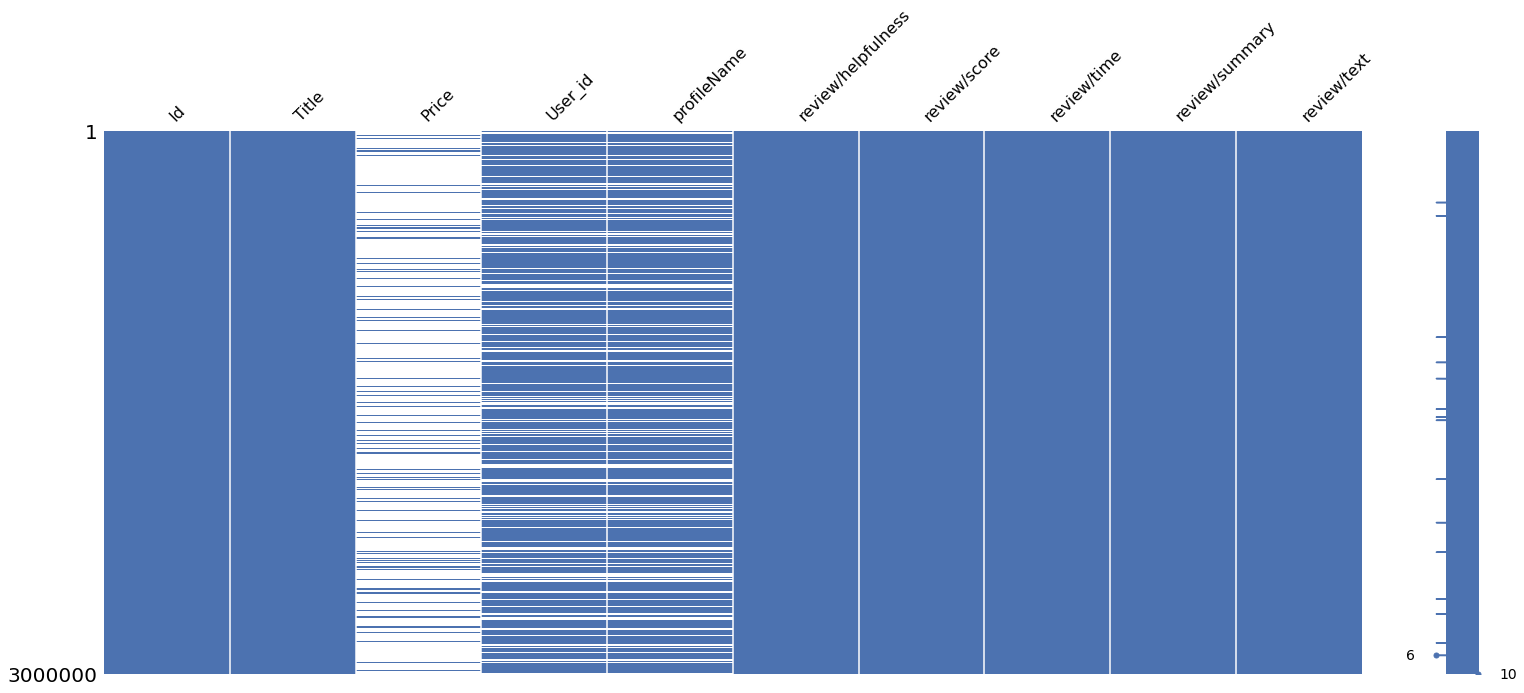

In [41]:
#Plotting the missing numbers for ratings
misngnum.matrix(df_ratings, color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))

In [42]:
# #Dropping the Price column
# df_ratings.drop('Price', axis=1, inplace=True)

In [43]:
df_books.isnull().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

<AxesSubplot:>

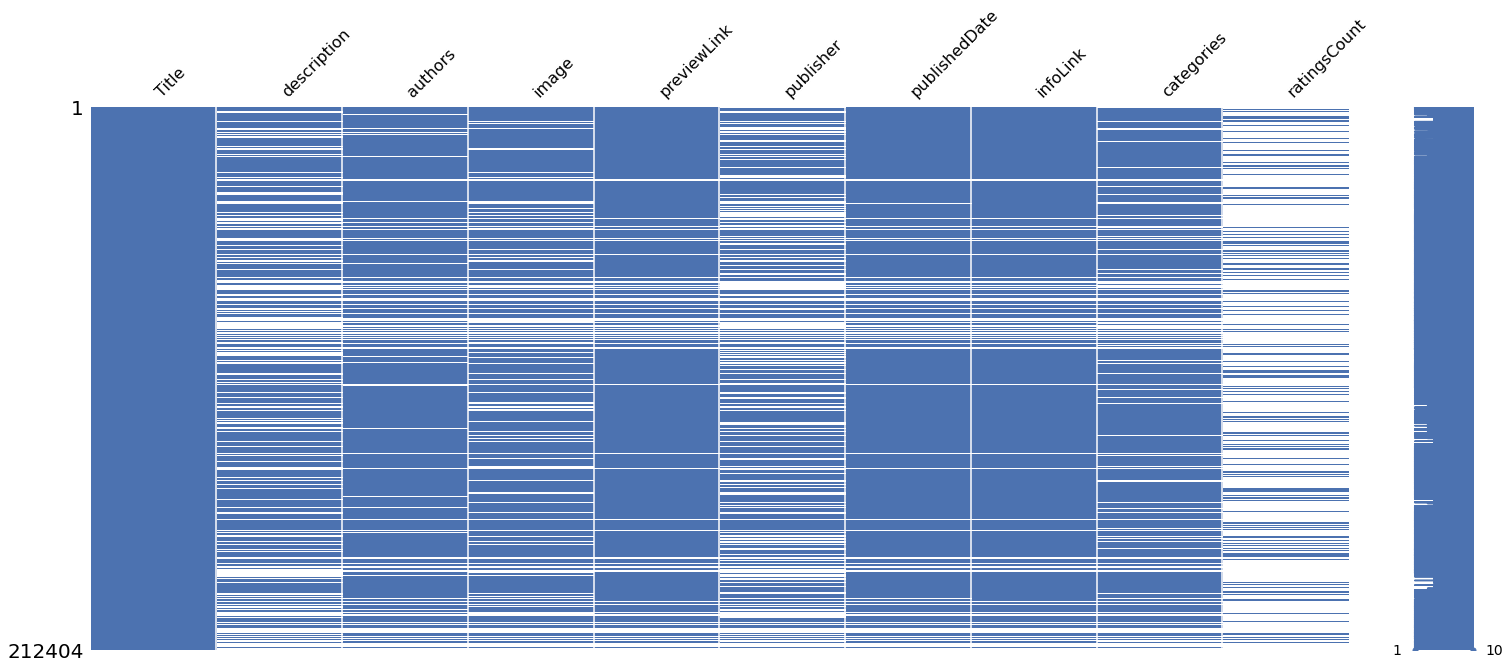

In [44]:
#Plotting the missing values for df_books
misngnum.matrix(df_books,color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))

# Data Pre-Processing

In [3]:
#Merging both the data frames based on title
data_merged=pd.merge(df_ratings,df_books, on = 'Title')
data_merged.shape

(3000000, 19)

## We can see that few columns are not helpful in performing sentiment analysis such as publisher,publishedDate etc. Hence we are only taking the columns that are relevant for the project problem statement.

In [4]:
#extracting usefull columns for our analysis
data_merged = data_merged[['Title','review/score','review/text','authors','categories','ratingsCount','User_id']]

In [5]:
# Removes brackets and colons from authors name
data_merged['authors']=data_merged['authors'].str.extract(r'\'(.*)\'')
# Removes bractes and colons from categories
data_merged['categories']=data_merged['categories'].str.extract(r'\'(.*)\'')

In [6]:
data_merged

Title  review/score  \
0        Its Only Art If Its Well Hung!           4.0   
1              Dr. Seuss: American Icon           5.0   
2              Dr. Seuss: American Icon           5.0   
3              Dr. Seuss: American Icon           4.0   
4              Dr. Seuss: American Icon           4.0   
...                                 ...           ...   
2999995             The Idea of History           4.0   
2999996             The Idea of History           4.0   
2999997             The Idea of History           4.0   
2999998             The Idea of History           5.0   
2999999             The Idea of History           1.0   

                                               review/text            authors  \
0        This is only for Julie Strain fans. It's a col...       Julie Strain   
1        I don't care much for Dr. Seuss but after read...         Philip Nel   
2        If people become the books they read and if "t...         Philip Nel   
3        Theodore Seuss Geisel (1904-1991), aka &quot;D...         Philip Nel   
4        Philip Nel - Dr. Seuss: American IconThis is b...         Philip Nel   
...                                                    ...                ...   
2999995  This is an extremely difficult book to digest,...  R. G. Collingwood   
2999996  This is pretty interesting. Collingwood seems ...  R. G. Collingwood   
2999997  This is a good book but very esoteric. "What i...  R. G. Collingwood   
2999998  My daughter, a freshman at Indiana University,...  R. G. Collingwood   
2999999  The guy has a few good ideas but, reader, bewa...  R. G. Collingwood   

                        categories  ratingsCount         User_id  
0          Comics & Graphic Novels           NaN   AVCGYZL8FQQTD  
1        Biography & Autobiography           NaN  A30TK6U7DNS82R  
2        Biography & Autobiography           NaN  A3UH4UZ4RSVO82  
3        Biography & Autobiography           NaN  A2MVUWT453QH61  
4        Biography & Autobiography           NaN  A22X4XUPKF66MR  
...                            ...           ...             ...  
2999995                    History           3.0             NaN  
2999996                    History           3.0  A1SMUB9ASL5L9Y  
2999997                    History           3.0  A2AQMEKZKK5EE4  
2999998                    History           3.0  A18SQGYBKS852K  
2999999                    History           3.0             NaN  

[3000000 rows x 7 columns]

## As we can see it is a big data set with most of the fields containing text. Here we will drop NaN values as we can not impute data ( mean,mode etc doesn't makes sense here ).For ratings count when the book isn't rated then imputing NaN values for that column will skew the data and impact the outcomes.

In [7]:
# Dropping Duplicates from the data
data_merged.drop_duplicates(inplace = True)
data_merged.shape

(2619721, 7)

In [8]:
data_merged.isna().sum()

Title               208
review/score          0
review/text           8
authors          363884
categories       475782
ratingsCount    1236042
User_id          486997
dtype: int64

In [9]:
# Dropping Null Values for above mentioned reasons
data_merged.dropna(inplace = True)
data_merged.isna().sum()

Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
User_id         0
dtype: int64

In [10]:
data_merged.shape


(1055806, 7)

In [11]:
#Printing the final refined data_merged
data_merged

Title  review/score  \
47       The Church of Christ: A Biblical Ecclesiology ...           5.0   
48       The Church of Christ: A Biblical Ecclesiology ...           5.0   
49       The Church of Christ: A Biblical Ecclesiology ...           4.0   
50       The Church of Christ: A Biblical Ecclesiology ...           4.0   
181      Voices from the Farm: Adventures in Community ...           5.0   
...                                                    ...           ...   
2999990                                The Idea of History           5.0   
2999994                                The Idea of History           4.0   
2999996                                The Idea of History           4.0   
2999997                                The Idea of History           4.0   
2999998                                The Idea of History           5.0   

                                               review/text            authors  \
47       With the publication of Everett Ferguson's boo...   Everett Ferguson   
48       Everett Ferguson approaches the subject of ear...   Everett Ferguson   
49       This book is a continual resource. It is so bi...   Everett Ferguson   
50       This is a very useful and thorough text book. ...   Everett Ferguson   
181      Ironically, I grew up in a small town close to...        Rupert Fike   
...                                                    ...                ...   
2999990  Highly Recommended.This book is one of the bes...  R. G. Collingwood   
2999994  History is not a scientific process of cutting...  R. G. Collingwood   
2999996  This is pretty interesting. Collingwood seems ...  R. G. Collingwood   
2999997  This is a good book but very esoteric. "What i...  R. G. Collingwood   
2999998  My daughter, a freshman at Indiana University,...  R. G. Collingwood   

                        categories  ratingsCount         User_id  
47                        Religion           5.0   ARI272XF8TOL4  
48                        Religion           5.0   A36TPZSH8LBT1  
49                        Religion           5.0   ANX3DDV12ZRRU  
50                        Religion           5.0  A2H2LORTA5EZY2  
181      Biography & Autobiography           1.0   A3W1KIKQ93S62  
...                            ...           ...             ...  
2999990                    History           3.0   AI1QNMVF2E3TN  
2999994                    History           3.0   AOFGOUMXLMVZS  
2999996                    History           3.0  A1SMUB9ASL5L9Y  
2999997                    History           3.0  A2AQMEKZKK5EE4  
2999998                    History           3.0  A18SQGYBKS852K  

[1055806 rows x 7 columns]

In [54]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 1055806 entries, 47 to 2999998

Data columns (total 7 columns):

 #   Column        Non-Null Count    Dtype  

---  ------        --------------    -----  

 0   Title         1055806 non-null  object 

 1   review/score  1055806 non-null  float64

 2   review/text   1055806 non-null  object 

 3   authors       1055806 non-null  object 

 4   categories    1055806 non-null  object 

 5   ratingsCount  1055806 non-null  float64

 6   User_id       1055806 non-null  object 

dtypes: float64(2), object(5)

memory usage: 64.4+ MB


## We will now clean the text data by removing any unnecessary or irrelevant information that can negatively affect the performance of natural language processing algorithms.Finally, the text is converted to lowercase, which is a common preprocessing step in natural language processing to standardize the text data and reduce the vocabulary size.
## By performing these cleaning steps, the resulting text data is more uniform and easier to work with, which can improve the performance of downstream text analysis tasks such as sentiment analysis or topic modeling.

In [12]:
#Function  to clean the data we are removine any HTML tags, punctutation ect
import re 
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<[^<]+?>', '', text)
    
    # Remove punctuation and special characters
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    
    # Convert text to lowercase
    text = text.lower()

    return text


In [13]:
#Cleaning the review comments
data_merged['cleaned_review'] = data_merged['review/text'].apply(clean_text)

In [14]:
data_merged['cleaned_review']

47         with the publication of everett ferguson s boo...
48         everett ferguson approaches the subject of ear...
49         this book is a continual resource it is so bib...
50         this is a very useful and thorough text book i...
181        ironically i grew up in a small town close to ...
                                 ...                        
2999990    highly recommended this book is one of the bes...
2999994    history is not a scientific process of cutting...
2999996    this is pretty interesting collingwood seems l...
2999997    this is a good book but very esoteric what is ...
2999998    my daughter a freshman at indiana university e...
Name: cleaned_review, Length: 1055806, dtype: object

In [15]:
# Creating a new Sentiment Column based on the review ratings
data_merged["sentiment"] = data_merged["review/score"].apply(lambda x: "Negative" if x <= 2 else ("Neutral" if x == 3 else "Positive"))

In [16]:
import plotly.graph_objects as go

colors = ['purple', 'mediumturquoise','pink']
labels = data_merged['sentiment'].value_counts().keys().map(str)
values = data_merged['sentiment'].value_counts()/data_merged['sentiment'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

fig.update_layout(width=800, height=600)  # set the width and height of the figure

fig.show()


In [19]:
data_merged_new["sentiment"].value_counts()

Negative    90000
Neutral     90000
Positive    90000
Name: sentiment, dtype: int64

In [17]:
data_merged = data_merged[data_merged['cleaned_review'].apply(lambda x: len(x.split()) >= 15)]

In [18]:
data_merged_new = data_merged.groupby('sentiment').apply(lambda x: x.sample(n=90000, random_state=42))

In [20]:
data_merged_new['tokens'] = data_merged_new['cleaned_review'].apply(nltk.word_tokenize)

In [21]:
data_merged_new

Title  \
sentiment                                                              
Negative  1956819                                      Jurassic Park   
          931528        The Thinking Woman's Guide to a Better Birth   
          2668554                    Disgrace: Complete & Unabridged   
          2812113  Man in the Shadows: Inside the Middle East Cri...   
          885632                                      House Atreides   
...                                                              ...   
Positive  1501482                                    The Coming Fury   
          2904290           THE MALTESE FALCON - A Sam Spade Mystery   
          1450510                                 The Abundance Book   
          1094175  The Innocent Man: Murder and Injustice in a Sm...   
          2157241  Cats 24/7: Extraordinary Photographs Of Wonder...   

                   review/score  \
sentiment                         
Negative  1956819           2.0   
          931528            1.0   
          2668554           1.0   
          2812113           1.0   
          885632            2.0   
...                         ...   
Positive  1501482           5.0   
          2904290           4.0   
          1450510           4.0   
          1094175           5.0   
          2157241           4.0   

                                                         review/text  \
sentiment                                                              
Negative  1956819  An evil, sleazy book, unheroic and malevolentl...   
          931528   This book was not what I thought is would be. ...   
          2668554  This book drives home the fact that awards are...   
          2812113  This book is long and boring account of an int...   
          885632   Dune: House Atreides is the first in the expan...   
...                                                              ...   
Positive  1501482  To Whom It May Concern:While I am not an exper...   
          2904290  Seventy-five years ago, San Francisco private ...   
          1450510  The book was exactly what i thought it would b...   
          1094175  I can't say I loved this book simply because i...   
          2157241  My cat appears in this book so I might be bias...   

                                                             authors  \
sentiment                                                              
Negative  1956819                                   Michael Crichton   
          931528                                          Henci Goer   
          2668554                                      J. M. Coetzee   
          2812113                                      Efraim Halevy   
          885632   Brian Herbert', 'Kevin J. Anderson', 'Frank He...   
...                                                              ...   
Positive  1501482                Bruce Catton', 'Everette Beach Long   
          2904290                                   Dashiell Hammett   
          1450510                                John Randolph Price   
          1094175                                       John Grisham   
          2157241                  Rick Smolan', 'David Elliot Cohen   

                             categories  ratingsCount         User_id  \
sentiment                                                               
Negative  1956819               Fiction        1677.0  A3NK6P0QFDUZL2   
          931528       Health & Fitness           8.0  A2B2PQ7E9BGGQF   
          2668554               Fiction         111.0  A3A8LDU2UVG7SV   
          2812113     Political Science           2.0  A1NNEAWPJN1MYG   
          885632                Fiction          28.0  A3VSIDO2HTQ2P0   
...                                 ...           ...             ...   
Positive  1501482         United States          11.0  A3G0UP308TILPI   
          2904290               Fiction         136.0  A10XZH78SDOI5M   
          1450510  Business & Economics           3.0  A3GJ8NFE6RV

In [28]:
data_merged_new.to_csv("data_merged_new.csv", index=False)

In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [27]:
#Lemmitzing the data 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('wordnet')
# nltk.download('stopwords')
# nltk.download()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_tokens(tokens):
    filtered_tokens = []
    for token in tokens:
        if token not in stop_words:
            lemma = lemmatizer.lemmatize(token)
            filtered_tokens.append(lemma)
    return filtered_tokens

data_merged_new['processed_tokens'] = data_merged_new['tokens'].apply(process_tokens)

## Tokenization is a process of breaking down a text or sentence into individual words or tokens. In natural language processing (NLP), tokenization is a fundamental step that is used to convert unstructured text data into structured data that can be used for various NLP tasks such as sentiment analysis, topic modeling, and text classification.

## Below the  function tokenize_text takes in a text as input, and using the word_tokenize function from the nltk library, it tokenizes the text into individual words. The resulting tokens are then returned by the function.

## The apply method is used to apply the tokenize_text function to each element of the cleaned_review column in the data_merged dataframe. The resulting tokens for each review are then stored in a new column called tokens.

## The resulting tokens column contains a list of words for each review in the data_merged dataframe. This column can be further used for various NLP tasks such as building a bag-of-words model, calculating word frequency, or training a machine learning model for sentiment analysis.

In [58]:
#Tokeninznng the data


def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

data_merged['tokens'] = data_merged['cleaned_review'].apply(tokenize_text)

In [59]:
data_merged['tokens']

47         [with, the, publication, of, everett, ferguson...
48         [everett, ferguson, approaches, the, subject, ...
49         [this, book, is, a, continual, resource, it, i...
50         [this, is, a, very, useful, and, thorough, tex...
181        [ironically, i, grew, up, in, a, small, town, ...
                                 ...                        
2999990    [highly, recommended, this, book, is, one, of,...
2999994    [history, is, not, a, scientific, process, of,...
2999996    [this, is, pretty, interesting, collingwood, s...
2999997    [this, is, a, good, book, but, very, esoteric,...
2999998    [my, daughter, a, freshman, at, indiana, unive...
Name: tokens, Length: 1055806, dtype: object

In [62]:
data_merged['tokens'].to_csv("tokens.csv", index=False)

## Lemmatization is a process of reducing a word to its base or root form, which is called a lemma. For example, the lemma of the word "running" is "run". Lemmatization is useful in NLP because it helps to reduce the dimensionality of the data by grouping together words that have the same root or meaning.

## The function process_tokens takes in a list of tokens as input, and for each token, it checks if the token is not in the set of stop words. If the token is not a stop word, it is then lemmatized using the WordNetLemmatizer from the nltk library, and the resulting lemma is appended to a new list called filtered_tokens.

## The apply method is used to apply the process_tokens function to each element of the tokens column in the data_merged dataframe. The resulting lemmas for each review are then stored in a new column called processed_tokens.

## The resulting processed_tokens column contains a list of lemmas for each review in the data_merged dataframe. This column can be used for various NLP tasks such as building a bag-of-words model, calculating word frequency, or training a machine learning model for sentiment analysis. The removal of stop words helps to eliminate noise and irrelevant words from the data, while lemmatization helps to group together words that have the same root or meaning, which can improve the accuracy of NLP models.

In [60]:
#Lemmitzing the data 


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_tokens(tokens):
    filtered_tokens = []
    for token in tokens:
        if token not in stop_words:
            lemma = lemmatizer.lemmatize(token)
            filtered_tokens.append(lemma)
    return filtered_tokens

data_merged['processed_tokens'] = data_merged['tokens'].apply(process_tokens)

In [61]:
data_merged['processed_tokens']

47         [publication, everett, ferguson, book, ecclesi...
48         [everett, ferguson, approach, subject, early, ...
49         [book, continual, resource, biblical, simple, ...
50         [useful, thorough, text, book, would, recommen...
181        [ironically, grew, small, town, close, farm, n...
                                 ...                        
2999990    [highly, recommended, book, one, best, book, e...
2999994    [history, scientific, process, cutting, pastin...
2999996    [pretty, interesting, collingwood, seems, like...
2999997    [good, book, esoteric, history, e, h, carr, ea...
2999998    [daughter, freshman, indiana, university, e, m...
Name: processed_tokens, Length: 1055806, dtype: object

In [63]:
data_merged['processed_tokens'].to_csv("processed_tokens.csv", index=False)

## We are doing this to add a new feature to the data_merged DataFrame that could be useful for analysis or modeling purposes. The word count of a review is a simple metric that could provide insight into the length and complexity of the review, which in turn could be related to the level of detail or the quality of the review. By adding this feature, we can analyze the relationship between the word count and other variables in the DataFrame, such as the rating, the category, or the sentiment of the review.

In [64]:
#creating a word count
data_merged['wrd_count']= data_merged['cleaned_review'].apply(lambda x: len(x.split(' ')))

In [65]:
data_merged['wrd_count']

47         1016
48           88
49           34
50           27
181         206
           ... 
2999990     278
2999994    2102
2999996     105
2999997      30
2999998      51
Name: wrd_count, Length: 1055806, dtype: int64

## Here we are counting the genres in the data set

In [66]:
genre_column = data_merged.loc[:, 'categories']
genre_counts = genre_column.value_counts()


In [67]:
genre_column

47                          Religion
48                          Religion
49                          Religion
50                          Religion
181        Biography & Autobiography
                     ...            
2999990                      History
2999994                      History
2999996                      History
2999997                      History
2999998                      History
Name: categories, Length: 1055806, dtype: object

## Plotting the various genres percentage wise

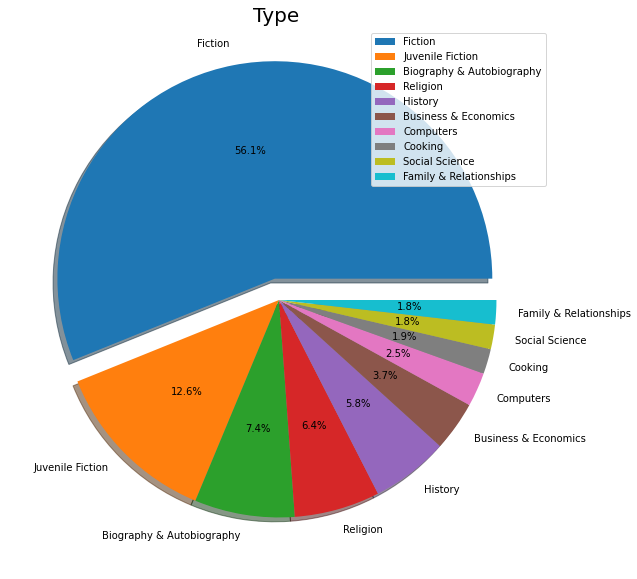

In [53]:
plt.rcParams['figure.figsize'] = (10, 10)
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data_merged['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Type ', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## Word Cloud for reviews with ratings greater than 3(Positiive review implied)

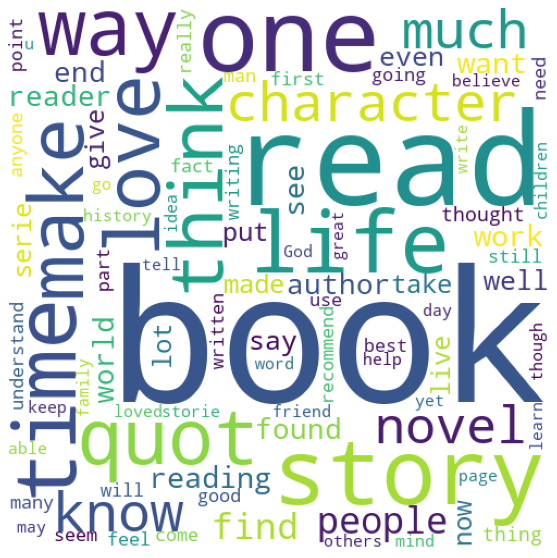

In [54]:

wrdCld = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam = wrdCld.generate(data_merged[data_merged['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam)

## Creating word cloud for most frequent words in less than 2 rated reviews

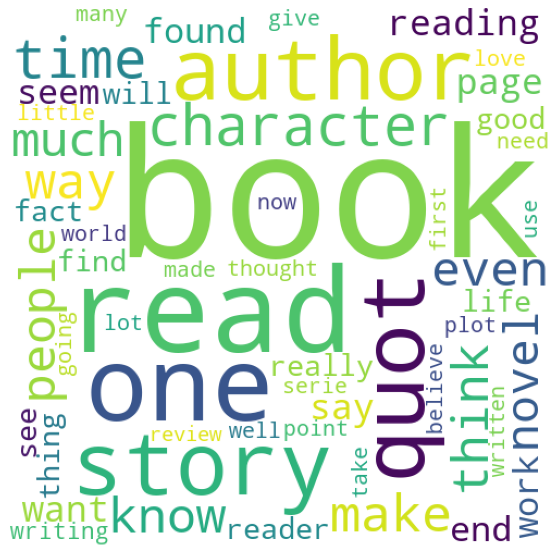

In [55]:

wrdCld = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_neg= wrdCld.generate(data_merged[data_merged['review/score'] <=2]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(spam_neg)

## We are creating this pie chart to visually represent the distribution of the review scores in the dataset. The pie chart can be a useful tool to quickly understand the proportions of each score and to identify any patterns or outliers.

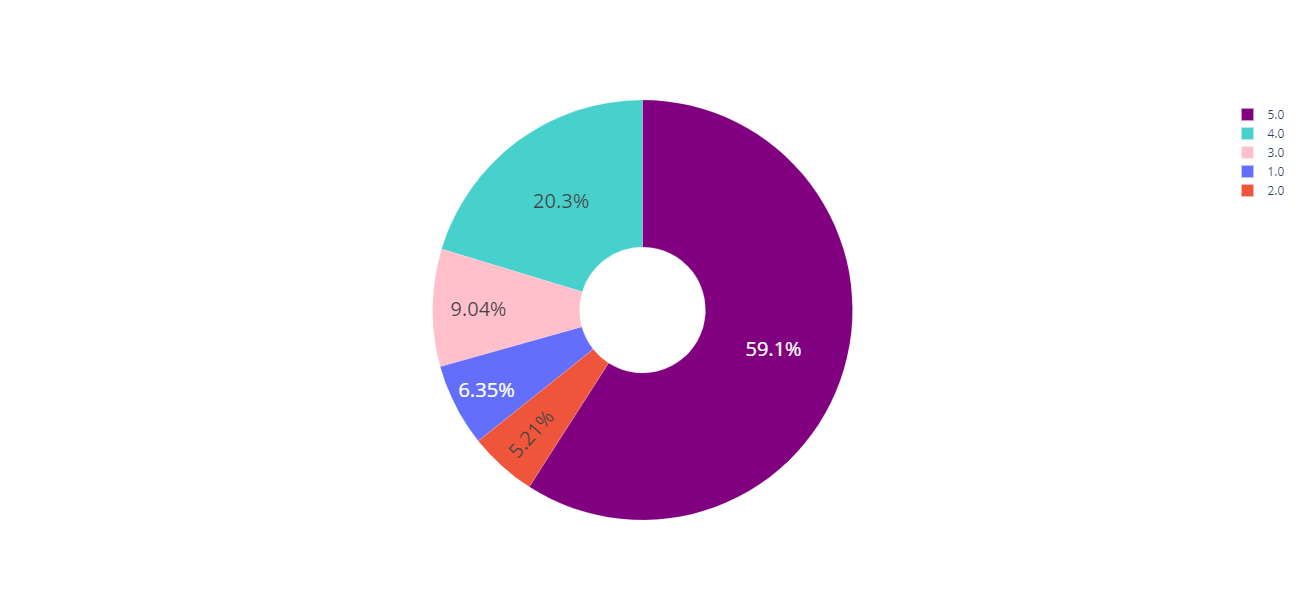

In [42]:
import plotly.graph_objects as go

colors = ['purple', 'mediumturquoise','pink']
labels = data_merged['review/score'].value_counts().keys().map(str)
values = data_merged['review/score'].value_counts()/data_merged['review/score'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

fig.update_layout(width=800, height=600)  # set the width and height of the figure

fig.show()


## As the size of data is big, just taking a sample size of 50000 for plotting few plots.with thebig data the name of the books are not visible.We use stratified sampling for getting data from all classes

In [44]:
# Set the sample size for each group
sample_size = 50000

# Group the data by the target variable
groups = data_merged.groupby('review/score')

# Define a function to sample a fixed number of rows from each group
def stratified_sample(group):
    return group.sample(n=sample_size, replace=True)

# Apply the function to each group
sample = groups.apply(stratified_sample)

# Reset the index of the resulting DataFrame
sample = sample.reset_index(drop=True)


## We are creating this pie chart to visually represent the distribution of the review scores in the dataset. The pie chart can be a useful tool to quickly understand the proportions of each score and to identify any patterns or outliers.We are plotting this for the stratified sample.

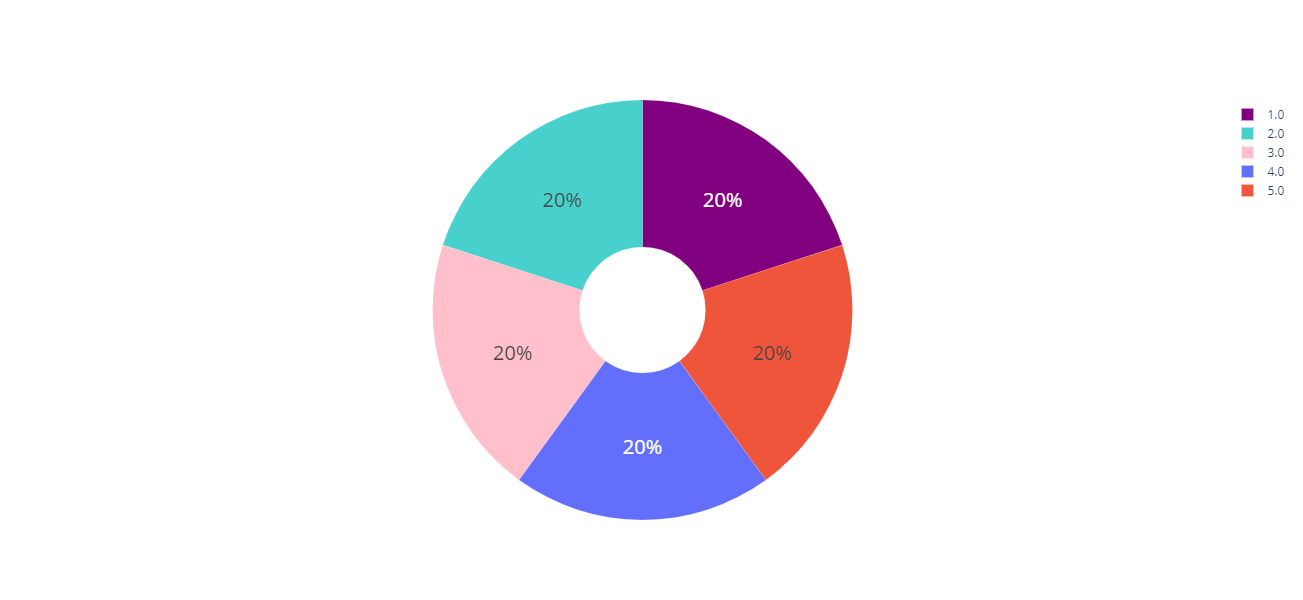

In [45]:
import plotly.graph_objects as go

colors = ['purple', 'mediumturquoise','pink']
labels = sample['review/score'].value_counts().keys().map(str)
values = sample['review/score'].value_counts()/sample['review/score'].value_counts().shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))

fig.update_layout(width=800, height=600)  # set the width and height of the figure

fig.show()


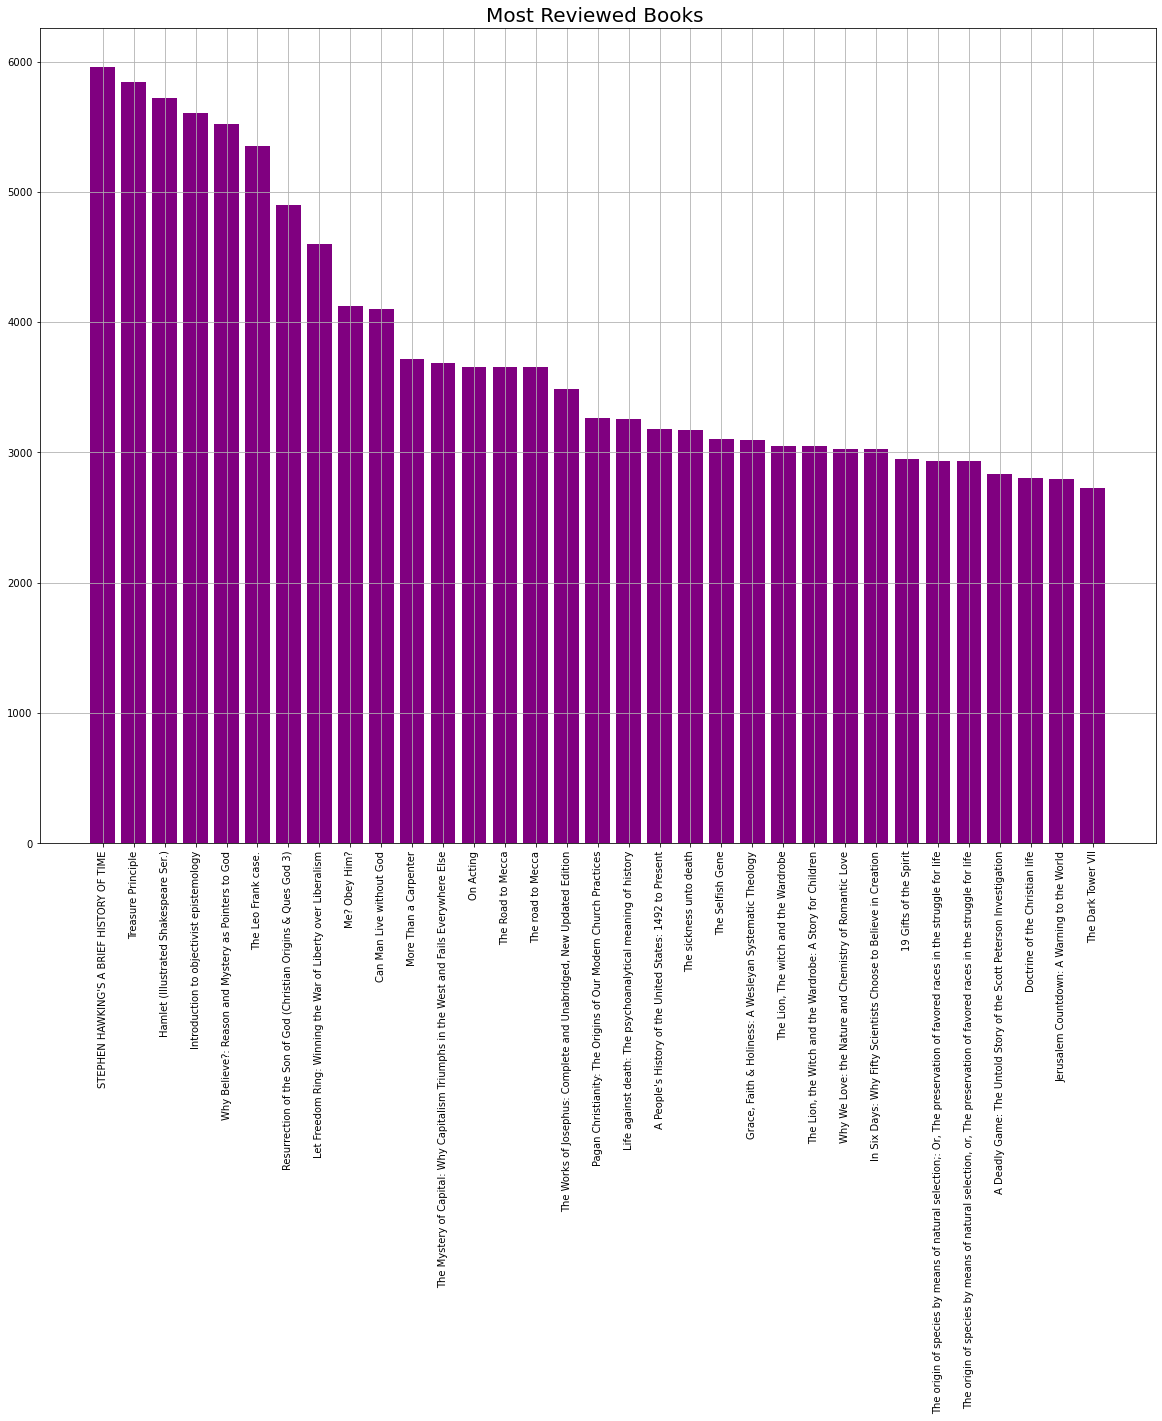

In [59]:
plt.figure(figsize = (20,15))
cou = sample[sample['wrd_count'] > 2707][['Title','wrd_count']].sort_values(ascending = False, by = 'wrd_count')
plt.bar(cou['Title'], cou['wrd_count'],color='purple')
plt.title('Most Reviewed Books ', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [60]:
genre_column = sample.loc[:, 'categories']
genre_counts = genre_column.value_counts()

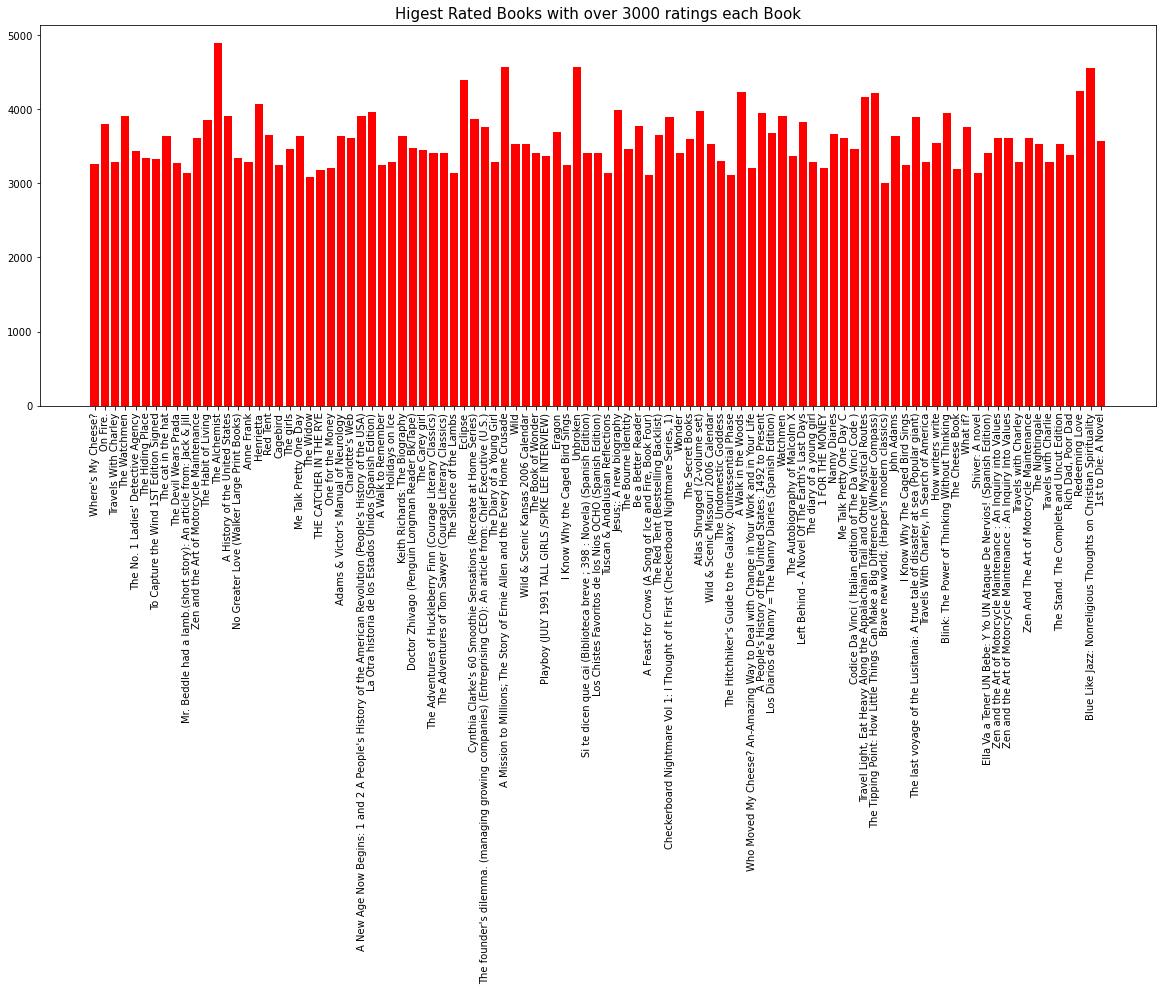

In [61]:
plt.figure(figsize = (20, 7))
rating_counts = data_merged[data_merged['ratingsCount'] > 3000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'],color='red')
plt.title('Higest Rated Books with over 3000 ratings each Book', fontsize = 15)
plt.xticks(rotation  = 'vertical')
plt.show()


## Top 10 Authors having 5 star rating

C:\Users\kumud\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:



Glyph 40644 (\N{CJK UNIFIED IDEOGRAPH-9EC4}) missing from current font.



C:\Users\kumud\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:



Glyph 27287 (\N{CJK UNIFIED IDEOGRAPH-6A97}) missing from current font.




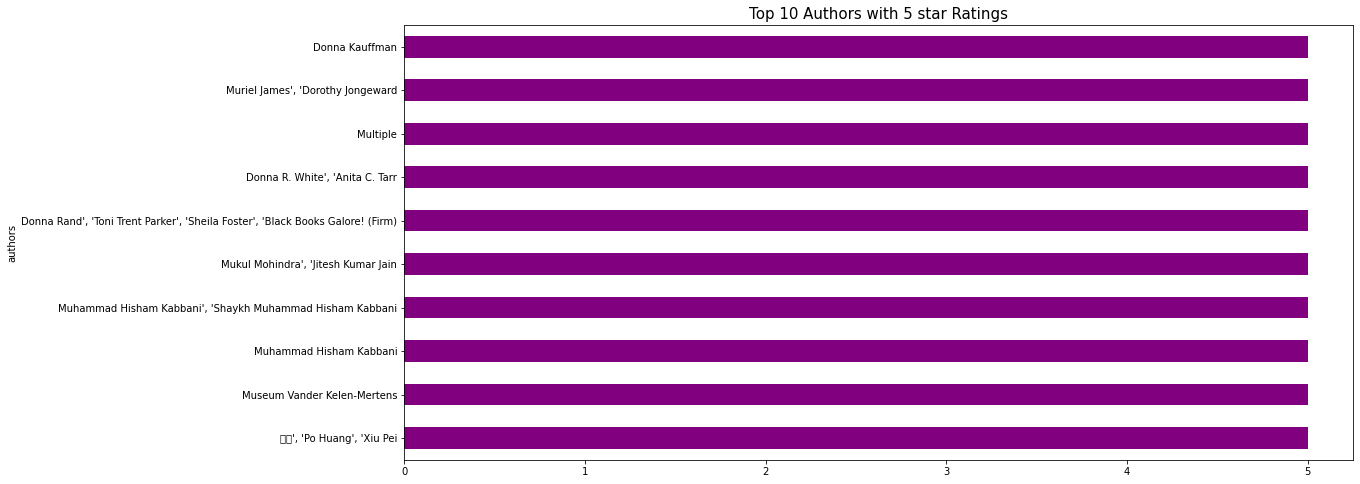

In [62]:
data_merged.groupby('authors').mean().sort_values(ascending = False, by = 'review/score')['review/score'].head(10).plot(kind='barh', figsize=(17,8),color='purple')
plt.title('Top 10 Authors with 5 star Ratings', fontsize = 15)
plt.show()

## Top 10 Authors having 1 star rating

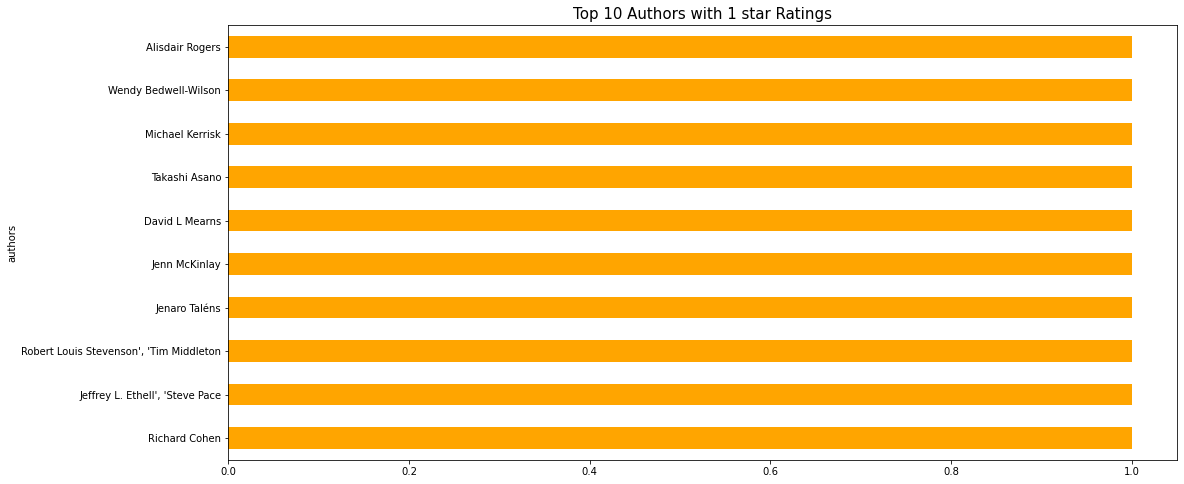

In [63]:
data_merged.groupby('authors').mean().sort_values(ascending = True, by = 'review/score')['review/score'].head(10).plot(kind='barh', figsize=(17,8),color='orange')
plt.title('Top 10 Authors with 1 star Ratings', fontsize = 15)
plt.show()

## Number of Books written by the Authors

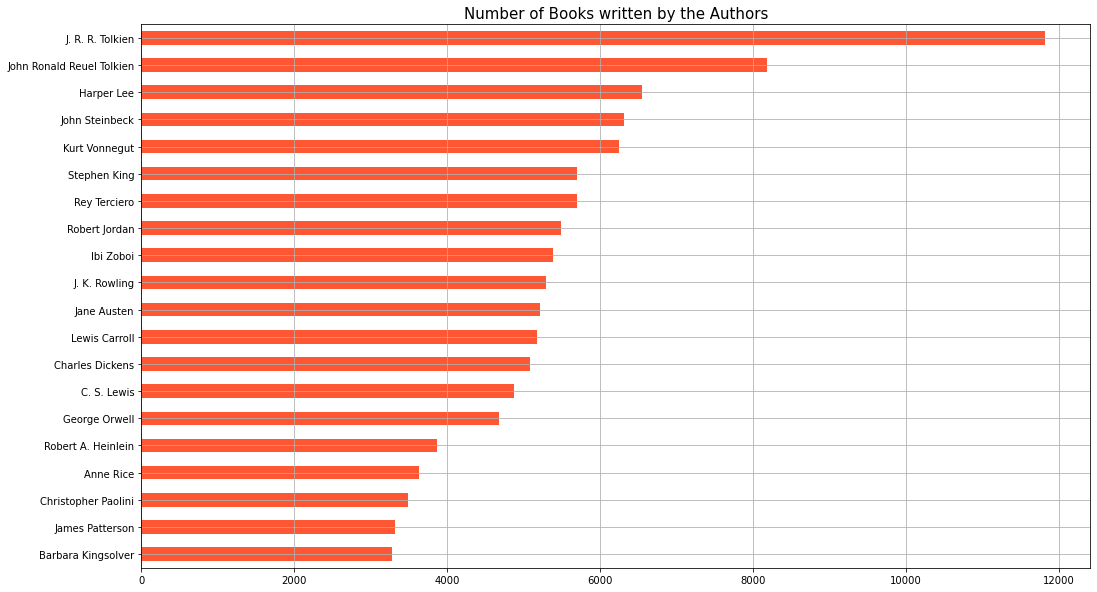

In [64]:
data_merged['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(17,10), color='#FF5733')
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.grid(visible=True, which='both')
plt.show()

## Genre wise classification of Positive and Negative Ratings by the readers

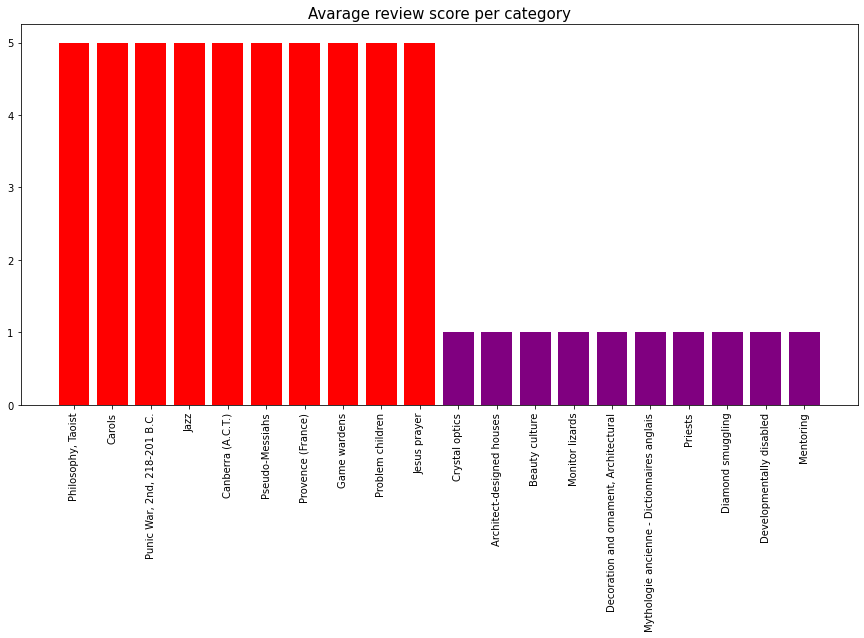

In [65]:
plt.figure(figsize = (15,7))
avg_cat_rating = data_merged.groupby('categories').mean().sort_values(ascending = False, by = 'review/score').head(10)
avg_cat_rating_d = data_merged.groupby('categories').mean().sort_values(ascending = False, by = 'review/score').tail(10)
plt.bar(avg_cat_rating.index,avg_cat_rating['review/score'],color='red')
plt.bar(avg_cat_rating_d.index,avg_cat_rating_d['review/score'],color='purple')
plt.title('Avarage review score per category', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

## Average Number of Ratings and Review Score by Book

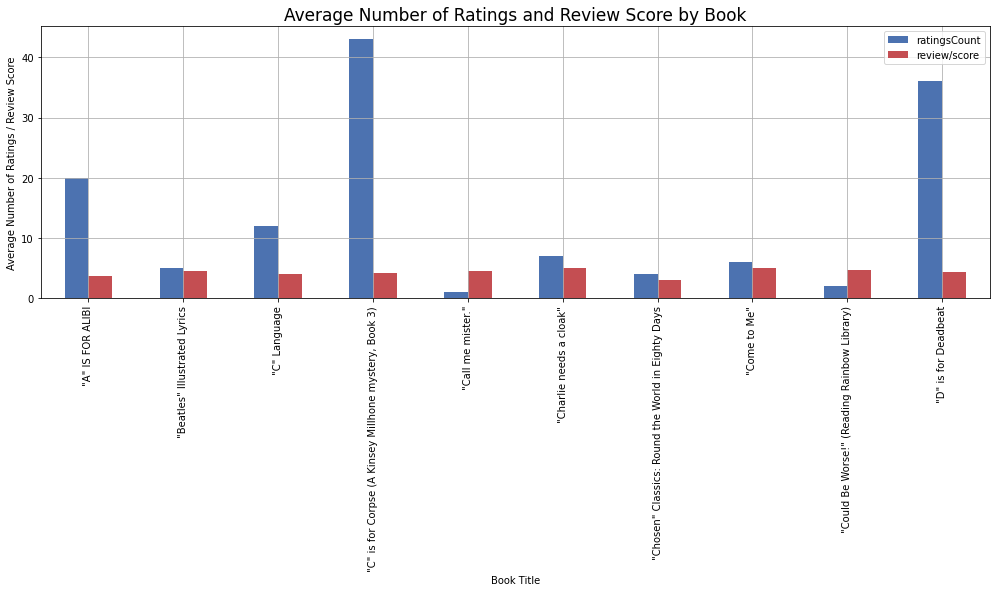

In [66]:
data_merged.groupby('Title').mean()[['ratingsCount','review/score']].head(10).plot(kind='bar', figsize=(17,5),color=['#4C72B0', '#C44E52'])
# add x-axis label
plt.xlabel('Book Title')

# add y-axis label
plt.ylabel('Average Number of Ratings / Review Score')

# add title
plt.title('Average Number of Ratings and Review Score by Book', fontsize = 17)

plt.grid()
plt.show()

## Part of Speech Tagging using nltk

## We are adding a new column 'POS_Tags' to the dataset for further analysis or feature engineering in natural language processing tasks.

## POS tagging helps in identifying the grammatical structure of sentences, which can be used to extract useful features such as identifying the noun phrases, verb phrases, and adjectives used in a sentence. These features can then be used to perform sentiment analysis, text classification, or other natural language processing tasks.

In [ ]:

# Define a function to get the POS tags for a sentence
def get_pos_tags(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags


# Add a new column 'POS_Tags' to the dataset
data_merged['POS_Tags'] = data_merged['review/text'].apply(get_pos_tags)

In [68]:
data_merged

Title  review/score  \
47       The Church of Christ: A Biblical Ecclesiology ...           5.0   
48       The Church of Christ: A Biblical Ecclesiology ...           5.0   
49       The Church of Christ: A Biblical Ecclesiology ...           4.0   
50       The Church of Christ: A Biblical Ecclesiology ...           4.0   
181      Voices from the Farm: Adventures in Community ...           5.0   
...                                                    ...           ...   
2999990                                The Idea of History           5.0   
2999994                                The Idea of History           4.0   
2999996                                The Idea of History           4.0   
2999997                                The Idea of History           4.0   
2999998                                The Idea of History           5.0   

                                               review/text            authors  \
47       With the publication of Everett Ferguson's boo...   Everett Ferguson   
48       Everett Ferguson approaches the subject of ear...   Everett Ferguson   
49       This book is a continual resource. It is so bi...   Everett Ferguson   
50       This is a very useful and thorough text book. ...   Everett Ferguson   
181      Ironically, I grew up in a small town close to...        Rupert Fike   
...                                                    ...                ...   
2999990  Highly Recommended.This book is one of the bes...  R. G. Collingwood   
2999994  History is not a scientific process of cutting...  R. G. Collingwood   
2999996  This is pretty interesting. Collingwood seems ...  R. G. Collingwood   
2999997  This is a good book but very esoteric. "What i...  R. G. Collingwood   
2999998  My daughter, a freshman at Indiana University,...  R. G. Collingwood   

                        categories  ratingsCount         User_id  \
47                        Religion           5.0   ARI272XF8TOL4   
48                        Religion           5.0   A36TPZSH8LBT1   
49                        Religion           5.0   ANX3DDV12ZRRU   
50                        Religion           5.0  A2H2LORTA5EZY2   
181      Biography & Autobiography           1.0   A3W1KIKQ93S62   
...                            ...           ...             ...   
2999990                    History           3.0   AI1QNMVF2E3TN   
2999994                    History           3.0   AOFGOUMXLMVZS   
2999996                    History           3.0  A1SMUB9ASL5L9Y   
2999997                    History           3.0  A2AQMEKZKK5EE4   
2999998                    History           3.0  A18SQGYBKS852K   

                                            cleaned_review  \
47       with the publication of everett ferguson s boo...   
48       everett ferguson approaches the subject of ear...   
49       this book is a continual resource it is so bib...   
50       this is a very useful and thorough text book i...   
181      ironically i grew up in a small town close to ...   
...                                                    ...   
2999990  highly recommended this book is one of the bes...   
2999994  history is not a scientific process of cutting...   
2999996  this is pretty interesting collingwood seems l...   
2999997  this is a good book but very esoteric what is ...   
2999998  my daughter a freshman at indiana university e...   

                                                    tokens  \
47       [with, the, publication, of, everett, ferguson...   
48       [everett, ferguson, approaches, the, subject, ...   
49       [this, book, is, a, continual, resource, it, i...   
50       [this, is, a, very, useful, and, thorough, tex...   
181      [ironically, i, grew, up, in, a, small, town, ...   
...                                                    ...   
2999990  [highly, recommended, this, book, is, one, of,...   
2999994  [history, is, not, a, scientific, process, of,...   
2999996  [this, is, pretty, interesting, collin

In [ ]:
import pandas as pd

# save the data_merged dataframe as a CSV file
data_merged.to_csv('data_merged_without_POS_tags.csv', index=False)


In [2]:
data_merged = pd.read_csv('/kaggle/input/processedfile/data_merged_without_POS_tags.csv')

In [6]:
# Creating a new Sentiment Column based on the review ratings
data_merged["sentiment"] = data_merged["ratingsCount"].apply(lambda x: "Negative" if x <= 2 else ("Neutral" if x == 3 else "Positive"))

In [7]:
data_merged

Title  review/score  \
0        The Church of Christ: A Biblical Ecclesiology ...           5.0   
1        The Church of Christ: A Biblical Ecclesiology ...           5.0   
2        The Church of Christ: A Biblical Ecclesiology ...           4.0   
3        The Church of Christ: A Biblical Ecclesiology ...           4.0   
4        Voices from the Farm: Adventures in Community ...           5.0   
...                                                    ...           ...   
1055801                                The Idea of History           5.0   
1055802                                The Idea of History           4.0   
1055803                                The Idea of History           4.0   
1055804                                The Idea of History           4.0   
1055805                                The Idea of History           5.0   

                                               review/text            authors  \
0        With the publication of Everett Ferguson's boo...   Everett Ferguson   
1        Everett Ferguson approaches the subject of ear...   Everett Ferguson   
2        This book is a continual resource. It is so bi...   Everett Ferguson   
3        This is a very useful and thorough text book. ...   Everett Ferguson   
4        Ironically, I grew up in a small town close to...        Rupert Fike   
...                                                    ...                ...   
1055801  Highly Recommended.This book is one of the bes...  R. G. Collingwood   
1055802  History is not a scientific process of cutting...  R. G. Collingwood   
1055803  This is pretty interesting. Collingwood seems ...  R. G. Collingwood   
1055804  This is a good book but very esoteric. "What i...  R. G. Collingwood   
1055805  My daughter, a freshman at Indiana University,...  R. G. Collingwood   

                        categories  ratingsCount         User_id  \
0                         Religion           5.0   ARI272XF8TOL4   
1                         Religion           5.0   A36TPZSH8LBT1   
2                         Religion           5.0   ANX3DDV12ZRRU   
3                         Religion           5.0  A2H2LORTA5EZY2   
4        Biography & Autobiography           1.0   A3W1KIKQ93S62   
...                            ...           ...             ...   
1055801                    History           3.0   AI1QNMVF2E3TN   
1055802                    History           3.0   AOFGOUMXLMVZS   
1055803                    History           3.0  A1SMUB9ASL5L9Y   
1055804                    History           3.0  A2AQMEKZKK5EE4   
1055805                    History           3.0  A18SQGYBKS852K   

                                            cleaned_review  \
0        with the publication of everett ferguson s boo...   
1        everett ferguson approaches the subject of ear...   
2        this book is a continual resource it is so bib...   
3        this is a very useful and thorough text book i...   
4        ironically i grew up in a small town close to ...   
...                                                    ...   
1055801  highly recommended this book is one of the bes...   
1055802  history is not a scientific process of cutting...   
1055803  this is pretty interesting collingwood seems l...   
1055804  this is a good book but very esoteric what is ...   
1055805  my daughter a freshman at indiana university e...   

                                                    tokens  \
0        ['with', 'the', 'publication', 'of', 'everett'...   
1        ['everett', 'ferguson', 'approaches', 'the', '...   
2        ['this', 'book', 'is', 'a', 'continual', 'reso...   
3        ['this', 'is', 'a', 'very', 'useful', 'and', '...   
4        ['ironically', 'i', 'grew', 'up', 'in', 'a', '...   
...                                                    ...   
1055801  ['highly', 'recommended', 'this', 'book', 'is'...   
1055802  ['history', 'is', 'not', 'a', 'scientific', 'p...   
1055803  ['this', 'is', 'pretty', 'interesting'

In [4]:
data_merged.shape

(1055806, 11)

# Word Embeddings using Word2Vec:

## The reason for performing these steps is to gain insights into the relationships between words in the corpus. By visualizing the word embeddings, we can identify clusters of related words, such as synonyms or words with similar meanings, and gain a deeper understanding of the underlying structure of the text data.

In [ ]:
import pandas as pd
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Train a Word2Vec model
model = Word2Vec(data_merged['tokens'], min_count=1, vector_size=100)

# Get the most similar words to a given word
similar_words = model.wv.most_similar('book')

# Visualize the word embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors = model.wv[model.wv.vocab]
vectors_tsne = tsne.fit_transform(vectors)

# Plot the word embeddings
fig, ax = plt.subplots(figsize=(10, 10))
for i, word in enumerate(model.wv.vocab):
    ax.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]))
plt.show()

# Model Processing

In [29]:
data_merged_new

Title  \
sentiment                                                              
Negative  1956819                                      Jurassic Park   
          931528        The Thinking Woman's Guide to a Better Birth   
          2668554                    Disgrace: Complete & Unabridged   
          2812113  Man in the Shadows: Inside the Middle East Cri...   
          885632                                      House Atreides   
...                                                              ...   
Positive  1501482                                    The Coming Fury   
          2904290           THE MALTESE FALCON - A Sam Spade Mystery   
          1450510                                 The Abundance Book   
          1094175  The Innocent Man: Murder and Injustice in a Sm...   
          2157241  Cats 24/7: Extraordinary Photographs Of Wonder...   

                   review/score  \
sentiment                         
Negative  1956819           2.0   
          931528            1.0   
          2668554           1.0   
          2812113           1.0   
          885632            2.0   
...                         ...   
Positive  1501482           5.0   
          2904290           4.0   
          1450510           4.0   
          1094175           5.0   
          2157241           4.0   

                                                         review/text  \
sentiment                                                              
Negative  1956819  An evil, sleazy book, unheroic and malevolentl...   
          931528   This book was not what I thought is would be. ...   
          2668554  This book drives home the fact that awards are...   
          2812113  This book is long and boring account of an int...   
          885632   Dune: House Atreides is the first in the expan...   
...                                                              ...   
Positive  1501482  To Whom It May Concern:While I am not an exper...   
          2904290  Seventy-five years ago, San Francisco private ...   
          1450510  The book was exactly what i thought it would b...   
          1094175  I can't say I loved this book simply because i...   
          2157241  My cat appears in this book so I might be bias...   

                                                             authors  \
sentiment                                                              
Negative  1956819                                   Michael Crichton   
          931528                                          Henci Goer   
          2668554                                      J. M. Coetzee   
          2812113                                      Efraim Halevy   
          885632   Brian Herbert', 'Kevin J. Anderson', 'Frank He...   
...                                                              ...   
Positive  1501482                Bruce Catton', 'Everette Beach Long   
          2904290                                   Dashiell Hammett   
          1450510                                John Randolph Price   
          1094175                                       John Grisham   
          2157241                  Rick Smolan', 'David Elliot Cohen   

                             categories  ratingsCount         User_id  \
sentiment                                                               
Negative  1956819               Fiction        1677.0  A3NK6P0QFDUZL2   
          931528       Health & Fitness           8.0  A2B2PQ7E9BGGQF   
          2668554               Fiction         111.0  A3A8LDU2UVG7SV   
          2812113     Political Science           2.0  A1NNEAWPJN1MYG   
          885632                Fiction          28.0  A3VSIDO2HTQ2P0   
...                                 ...           ...             ...   
Positive  1501482         United States          11.0  A3G0UP308TILPI   
          2904290               Fiction         136.0  A10XZH78SDOI5M   
          1450510  Business & Economics           3.0  A3GJ8NFE6RV

In [30]:
# Convert categorical Sentiment column into numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_merged_new['label'] = le.fit_transform(data_merged_new['sentiment'])

In [31]:
data_merged_new

Title  \
sentiment                                                              
Negative  1956819                                      Jurassic Park   
          931528        The Thinking Woman's Guide to a Better Birth   
          2668554                    Disgrace: Complete & Unabridged   
          2812113  Man in the Shadows: Inside the Middle East Cri...   
          885632                                      House Atreides   
...                                                              ...   
Positive  1501482                                    The Coming Fury   
          2904290           THE MALTESE FALCON - A Sam Spade Mystery   
          1450510                                 The Abundance Book   
          1094175  The Innocent Man: Murder and Injustice in a Sm...   
          2157241  Cats 24/7: Extraordinary Photographs Of Wonder...   

                   review/score  \
sentiment                         
Negative  1956819           2.0   
          931528            1.0   
          2668554           1.0   
          2812113           1.0   
          885632            2.0   
...                         ...   
Positive  1501482           5.0   
          2904290           4.0   
          1450510           4.0   
          1094175           5.0   
          2157241           4.0   

                                                         review/text  \
sentiment                                                              
Negative  1956819  An evil, sleazy book, unheroic and malevolentl...   
          931528   This book was not what I thought is would be. ...   
          2668554  This book drives home the fact that awards are...   
          2812113  This book is long and boring account of an int...   
          885632   Dune: House Atreides is the first in the expan...   
...                                                              ...   
Positive  1501482  To Whom It May Concern:While I am not an exper...   
          2904290  Seventy-five years ago, San Francisco private ...   
          1450510  The book was exactly what i thought it would b...   
          1094175  I can't say I loved this book simply because i...   
          2157241  My cat appears in this book so I might be bias...   

                                                             authors  \
sentiment                                                              
Negative  1956819                                   Michael Crichton   
          931528                                          Henci Goer   
          2668554                                      J. M. Coetzee   
          2812113                                      Efraim Halevy   
          885632   Brian Herbert', 'Kevin J. Anderson', 'Frank He...   
...                                                              ...   
Positive  1501482                Bruce Catton', 'Everette Beach Long   
          2904290                                   Dashiell Hammett   
          1450510                                John Randolph Price   
          1094175                                       John Grisham   
          2157241                  Rick Smolan', 'David Elliot Cohen   

                             categories  ratingsCount         User_id  \
sentiment                                                               
Negative  1956819               Fiction        1677.0  A3NK6P0QFDUZL2   
          931528       Health & Fitness           8.0  A2B2PQ7E9BGGQF   
          2668554               Fiction         111.0  A3A8LDU2UVG7SV   
          2812113     Political Science           2.0  A1NNEAWPJN1MYG   
          885632                Fiction          28.0  A3VSIDO2HTQ2P0   
...                                 ...           ...             ...   
Positive  1501482         United States          11.0  A3G0UP308TILPI   
          2904290               Fiction         136.0  A10XZH78SDOI5M   
          1450510  Business & Economics           3.0  A3GJ8NFE6RV

In [32]:
data_merged_new['processed_tokens'][1000]

['description',
 'said',
 'receive',
 'playstation',
 'version',
 'strategy',
 'guide',
 'received',
 'pc',
 'version',
 'instead',
 'version',
 'may',
 'identical',
 'vary',
 'slightly',
 'still',
 'unsure',
 'description',
 'stated',
 'pc',
 'version',
 'transaction',
 'otherwise',
 'went',
 'smoothly',
 'would',
 'transact',
 'sellet']

In [33]:
# Splitting the data set into test and train data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_merged_new['processed_tokens'], data_merged_new['label'], test_size=0.2, 
                                                    random_state=42)

In [34]:
# Save the train and test sets to file
X_train.to_pickle("X_train.pkl")
X_test.to_pickle("X_test.pkl")
y_train.to_pickle("y_train.pkl")
y_test.to_pickle("y_test.pkl")

In [10]:
# Read in the pickled files
X_train = pd.read_pickle("/kaggle/input/trainedfiles/X_train.pkl")
X_test = pd.read_pickle("/kaggle/input/trainedfiles/X_test.pkl")
y_train = pd.read_pickle("/kaggle/input/trainedfiles/y_train.pkl")
y_test = pd.read_pickle("/kaggle/input/trainedfiles/y_test.pkl")

In [35]:
X_train.shape

(216000,)

In [36]:
X_train

sentiment         
Neutral    1595865    [map, glass, tough, read, respected, reviewer,...
Positive   2407844    [bleak, house, universally, considered, one, c...
Neutral    2490778    [could, much, better, book, science, book, see...
           2905975    [year, read, number, book, series, faye, kelle...
           781763     [book, feature, cover, ivan, brunetti, mistake...
                                            ...                        
           2626869    [surprisingly, little, english, life, legendar...
Positive   2670122    [reading, book, like, eating, thanksgiving, di...
Neutral    2060325    [much, time, reading, time, spent, precious, r...
           250433     [full, sarcasm, ridiculously, funny, wonderful...
           634397     [book, good, info, also, got, little, boring, ...
Name: processed_tokens, Length: 216000, dtype: object

In [179]:
y_train

sentiment         
Neutral    117722     1
Negative   1137270    0
           1992280    0
Neutral    903118     1
Negative   2629410    0
                     ..
           2181956    0
Neutral    2336416    1
Positive   2668704    2
Negative   2675049    0
           237635     0
Name: label, Length: 72000, dtype: int64

In [37]:
# Convert the processed tokens ino vectors using 'bag of words' model
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x)))
X_test_vec = vectorizer.transform(X_test.apply(lambda x: ' '.join(x)))

In [39]:
import pickle

# save X_train_vec to a file
with open('X_train_vec.pkl', 'wb') as f:
    pickle.dump(X_train_vec, f)

# save X_test_vec to a file
with open('X_test_vec.pkl', 'wb') as f:
    pickle.dump(X_test_vec, f)

In [13]:
import pickle

# load X_train_vec from file
with open('/kaggle/input/trainedfiles/X_train_vec.pkl', 'rb') as f:
    X_train_vec = pickle.load(f)

# load X_test_vec from file
with open('/kaggle/input/trainedfiles/X_test_vec.pkl', 'rb') as f:
    X_test_vec = pickle.load(f)

In [41]:
X_train_vec

<216000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 11112503 stored elements in Compressed Sparse Row format>

In [87]:
# Training Classifiers on training set
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

## Naive Bayes Classifier

In [43]:
# Multinomial Naive Bayes Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()

# Define the hyperparameters and their values to test
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 6.0, 10.0, 100],
    'fit_prior': [True, False]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(clf_nb, param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train_vec, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best hyperparameters:  {'alpha': 100, 'fit_prior': True}
Best accuracy score:  0.6457546296296297


In [44]:
clf_nb_optimized = MultinomialNB(alpha=grid_search.best_params_['alpha'], fit_prior=grid_search.best_params_['fit_prior'])
clf_nb_optimized.fit(X_train_vec, y_train)

MultinomialNB(alpha=100)

In [47]:
import joblib

# Save the trained model to a file
joblib.dump(clf_nb_optimized, 'multinomial_nb_model.joblib')

['multinomial_nb_model.joblib']

In [45]:
y_pred = clf_nb_optimized.predict(X_test_vec)

In [46]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.67      0.65      0.66     17932
     Neutral       0.56      0.58      0.57     18037
    Positive       0.71      0.70      0.70     18031

    accuracy                           0.64     54000
   macro avg       0.65      0.64      0.65     54000
weighted avg       0.65      0.64      0.65     54000



In [48]:
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
df_results = pd.DataFrame(report).transpose()
df_results.to_csv('experiment_log.csv', index=False)

In [49]:
df_results

precision    recall  f1-score       support
Negative       0.673758  0.653469  0.663458  17932.000000
Neutral        0.560172  0.584521  0.572087  18037.000000
Positive       0.705009  0.695469  0.700207  18031.000000
accuracy       0.644463  0.644463  0.644463      0.644463
macro avg      0.646313  0.644486  0.645251  54000.000000
weighted avg   0.646253  0.644463  0.645209  54000.000000

## Logistic Regression

In [50]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [51]:
# Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

# Define the hyperparameters and their values to test
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_intercept': [True, False]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(clf_lr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_vec, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best hyperparameters:  {'C': 0.5, 'fit_intercept': False, 'penalty': 'l2'}
Best accuracy score:  0.6742824074074074


In [62]:
clf_lr_optimized = LogisticRegression(penalty=grid_search.best_params_['penalty'], C=grid_search.best_params_['C'], fit_intercept=grid_search.best_params_['fit_intercept'], n_jobs=-1)
clf_lr_optimized.fit(X_train_vec, y_train)

LogisticRegression(C=0.5, fit_intercept=False, n_jobs=-1)

In [65]:
import joblib

# Save the trained model to a file
joblib.dump(clf_lr_optimized, 'Logistic_Regression_model.joblib')

['Logistic_Regression_model.joblib']

In [63]:
y_pred_lr = clf_lr_optimized.predict(X_test_vec)

In [64]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_lr, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.70      0.69      0.70     17932
     Neutral       0.60      0.57      0.59     18037
    Positive       0.72      0.75      0.74     18031

    accuracy                           0.67     54000
   macro avg       0.67      0.67      0.67     54000
weighted avg       0.67      0.67      0.67     54000



In [66]:
report = classification_report(y_test, y_pred_lr, target_names=le.classes_, output_dict=True)
df_results = pd.DataFrame(report).transpose()
df_results

precision    recall  f1-score       support
Negative       0.700219  0.694791  0.697495  17932.000000
Neutral        0.596034  0.574985  0.585320  18037.000000
Positive       0.720636  0.751650  0.735816  18031.000000
accuracy       0.673759  0.673759  0.673759      0.673759
macro avg      0.672297  0.673809  0.672877  54000.000000
weighted avg   0.672237  0.673759  0.672822  54000.000000

In [ ]:
df_log = pd.read_csv('experiment_log.csv')  # Load the existing log file
df_log = df_log.append(df_results, ignore_index=True)  # Append the new results
df_log.to_csv('experiment_log.csv', index=False)

## Random Forest Classifier

In [84]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier object
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42, criterion='entropy', n_jobs = -1)

# Fit the classifier to the training data
clf_rf.fit(X_train_vec, y_train)

# Evaluate the classifier on the test data
# score = clf_rf.score(X_test_vec, y_test)

# print("Random forest classifier accuracy:", score)


RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42)

In [85]:
y_pred_rf = clf_rf.predict(X_test_vec)

In [86]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.69      0.71      0.70     17932
     Neutral       0.63      0.62      0.62     18037
    Positive       0.72      0.72      0.72     18031

    accuracy                           0.68     54000
   macro avg       0.68      0.68      0.68     54000
weighted avg       0.68      0.68      0.68     54000



In [88]:
report = classification_report(y_test, y_pred_rf, target_names=le.classes_, output_dict=True)
df_results = pd.DataFrame(report).transpose()
df_results

precision    recall  f1-score       support
Negative       0.692341  0.708789  0.700468  17932.000000
Neutral        0.630532  0.615291  0.622818  18037.000000
Positive       0.715869  0.716266  0.716068  18031.000000
accuracy       0.680056  0.680056  0.680056      0.680056
macro avg      0.679581  0.680115  0.679785  54000.000000
weighted avg   0.679552  0.680056  0.679741  54000.000000

In [89]:
df_log = pd.read_csv('experiment_log.csv')  # Load the existing log file
df_log = df_log.append(df_results, ignore_index=True)  # Append the new results
df_log.to_csv('experiment_log.csv', index=False)

In [90]:
import joblib

# Save the trained model to a file
joblib.dump(clf_rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Create a new XGBClassifier instance
clf_xgb = XGBClassifier(random_state=42)

# Create a GridSearchCV object with the specified parameters
grid_search = GridSearchCV(clf_xgb, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_vec, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Fit the best estimator to the training data
clf_xgb = grid_search.best_estimator_
clf_xgb.fit(X_train_vec, y_train)


In [92]:
y_pred_xgb = clf_xgb.predict(X_test_vec)

In [93]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

              precision    recall  f1-score   support

    Negative       0.70      0.66      0.68     17932
     Neutral       0.60      0.58      0.59     18037
    Positive       0.68      0.74      0.71     18031

    accuracy                           0.66     54000
   macro avg       0.66      0.66      0.66     54000
weighted avg       0.66      0.66      0.66     54000

